In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle


In [2]:
credict = pd.read_csv('creditcard.csv')
print(credict.shape)
credict.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credict.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Check if the nan value is in the data

In [4]:
credict.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

###  0: 正常 ; 1:被盜刷

0    0.998273
1    0.001727
Name: Class, dtype: float64


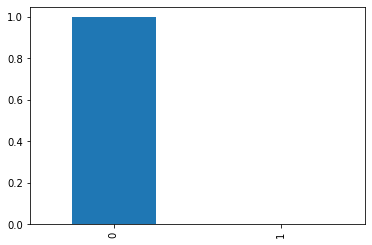

In [5]:
print(credict.Class.value_counts(normalize=True))
credict.Class.value_counts(normalize=True).plot.bar()


# Feature

## AMOUNT


In [6]:
credict.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

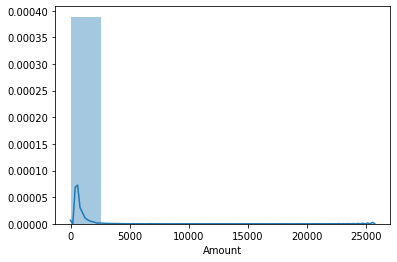

In [7]:
sns.distplot(credict[credict.Class == 0].Amount, bins=10 )

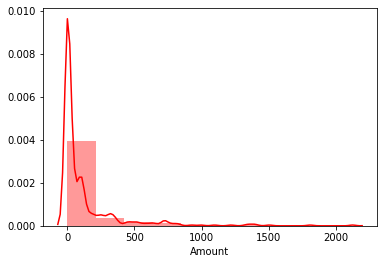

In [8]:
sns.distplot(credict[credict.Class == 1].Amount, bins=10, color='r' )

# Time (資料集中每個刷卡時間和第一次刷卡時間之間經過的秒數)

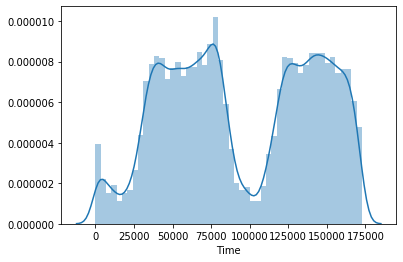

In [9]:
sns.distplot(credict.Time)

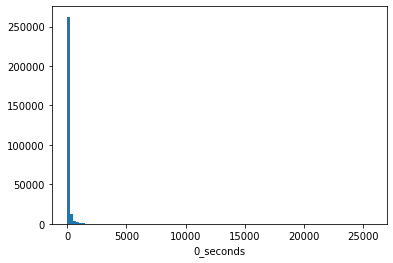

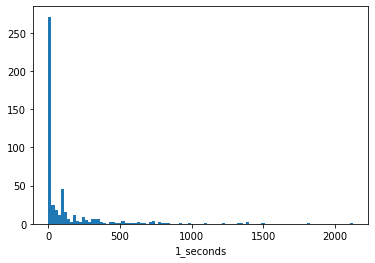

In [10]:
for c in [0, 1]:
    plt.figure()
    plt.hist(credict[credict.Class == c].Amount, bins=100)
    
    plt.xlabel(f'{c}_seconds')

# Data Preprocessing

## Clip data

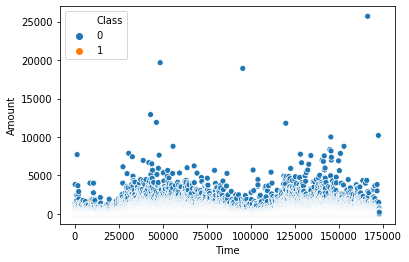

In [11]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credict)

In [12]:
def clip_data(data: pd.Series):
    std, mean = data.describe()[['std', 'mean']]
    res = np.clip(data, mean - 2*std, mean + 2*std)
    return res
credict['clip_Amount'] = clip_data(credict.Amount)

In [13]:
credict = credict.drop('Amount', 1)

In [14]:
norm_credict = credict.copy()
SCALER_FEATURE =  ['Time', 'clip_Amount']
for c in SCALER_FEATURE:
    norm_credict[f'norm_{c}'] =MinMaxScaler((-1, 1)).fit_transform(norm_credict[c].values.reshape(-1, 1))[:,0]
    norm_credict.drop(c, 1, inplace=True)

In [15]:
norm_credict.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,norm_Time,norm_clip_Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,0.097433,-0.751347
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,0.549657,0.424779
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-1.000000,-1.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-0.372639,-0.980971
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-0.019723,-0.925245
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,0.612580,-0.737797
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.000000,1.000000


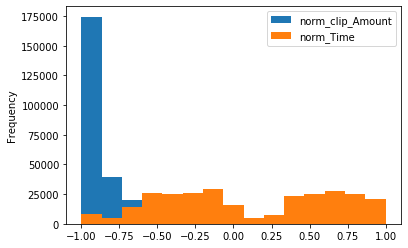

In [16]:
norm_credict[['norm_clip_Amount', 'norm_Time']].plot.hist(bins=15)

### Train、validation、Test

In [17]:
norm_credict = shuffle(norm_credict)
norm_credict = norm_credict.reset_index(drop=True, inplace=False)
norm_credict

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,norm_Time,norm_clip_Amount
0,2.034932,-0.712675,-0.979103,-0.382545,-0.858343,-1.266888,-0.274602,-0.330948,-0.977840,1.113467,...,0.437241,0.147126,0.598043,-0.170892,0.735138,-0.067742,-0.060997,0,0.827642,-0.850830
1,-0.851127,0.938966,-0.577325,0.682665,1.538059,0.143840,1.347760,-0.693850,-0.567589,1.019641,...,0.947941,-0.299978,0.195732,0.339022,0.277469,-0.709937,-0.090329,0,0.592956,-0.919503
2,-0.845753,1.111214,1.338148,0.481897,0.954600,0.237305,1.418864,-0.484342,-0.676480,0.734129,...,-0.595201,-0.036675,-0.334959,-0.235721,-0.733246,-0.324822,-0.236658,0,-0.557561,-0.849743
3,1.814767,-0.907372,-0.921913,0.047714,-0.488396,0.088158,-0.545846,0.277971,1.526263,-0.061854,...,-1.278389,0.377917,0.232527,-0.588075,-0.442924,-0.045220,-0.036965,0,0.612135,-0.660205
4,-0.203663,0.682413,0.675831,0.056310,0.658766,-0.865711,0.849220,-0.221054,-0.505048,-0.410363,...,-0.406430,0.041713,-0.059735,-0.654468,0.323260,0.119546,0.174094,0,0.773948,-0.966054
5,1.008576,-0.101722,1.541762,2.816695,-0.847473,1.015825,-0.905966,0.578967,0.460354,0.562092,...,0.536602,-0.066107,0.217073,0.424157,0.219151,0.049477,0.011634,0,-0.674105,-0.994835
6,1.074697,0.114608,-0.245036,1.199637,-0.133294,-1.174543,0.640334,-0.340672,-0.178751,0.018671,...,-0.049156,-0.228300,0.391553,0.789141,-0.305110,-0.032508,0.027548,0,-0.262396,-0.639817
7,-0.082045,-2.636027,0.700055,1.030362,-2.166798,0.019709,-0.113622,-0.190842,-0.660043,0.375991,...,-0.024752,-0.625209,0.441007,0.052682,-0.333196,-0.019946,0.174042,0,-0.308938,1.000000
8,2.121769,-1.111667,-0.957774,-0.942334,-0.602694,0.012261,-0.864606,-0.003422,0.229113,0.624518,...,-0.769405,0.328544,-0.009158,-0.388589,-0.566958,-0.008017,-0.035368,0,0.625318,-0.793235
9,1.923408,-0.689427,0.042783,0.257707,-1.005376,0.022932,-1.205689,0.250355,3.288585,-0.529823,...,0.122251,0.212858,-0.544209,-0.392214,-0.671701,0.032588,-0.047075,0,0.290164,-0.933706


In [18]:
X = norm_credict.drop('Class', 1)
y = norm_credict['Class']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.1, 
                                                    random_state=42)



X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256326, 30), (28481, 30), (256326,), (28481,))

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.1, 
                                                  random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((230693, 30), (25633, 30), (230693,), (25633,))

In [21]:
validation_data = pd.concat([X_val, y_val], 1)
validation_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,norm_Time,norm_clip_Amount,Class
283839,1.167149,0.580531,0.764422,2.485250,-0.233471,-0.532535,0.129507,-0.096618,-0.723084,0.669448,...,-0.809452,0.138651,0.337093,0.241743,-0.266929,-0.009152,0.030186,-0.640574,-0.957729,0
155249,1.547455,-1.232937,-1.372903,-2.488334,1.086664,3.142479,-1.324989,0.685741,-2.093053,1.513765,...,-0.335958,-0.088732,0.997925,0.673749,-0.102323,0.018339,0.012742,-0.132587,-0.881072,0
181962,-0.823378,0.467308,-0.418779,-0.323815,0.328374,-1.337749,0.450679,0.381590,0.329870,-1.888614,...,-0.667411,-0.005905,-0.200083,0.159765,-0.076703,-0.151472,-0.128807,0.993113,-0.799011,0
169990,1.058605,-0.578154,1.084367,0.049894,-0.827569,0.872234,-0.933233,0.507671,1.018488,-0.361406,...,-0.119034,0.124776,-0.214339,-0.063831,0.984587,-0.010073,-0.001713,-0.668249,-0.932041,0
121783,-0.351287,1.183754,0.530794,0.543891,0.798441,-0.804472,1.563170,-0.935794,0.633634,2.303627,...,0.668124,-0.057380,0.301398,-0.730946,-0.538616,-0.037212,-0.479956,-0.997778,-0.993918,0


### SMOTE  (only on train data)

In [22]:
from keras.utils import np_utils
from collections import Counter

from imblearn.over_sampling import SMOTE

In [23]:


print('Before resampled dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))


Before resampled dataset shape Counter({0: 230280, 1: 413})
Resampled dataset shape Counter({0: 230280, 1: 230280})


# Test

In [24]:
from util import *
import numpy as np

In [25]:
import tensorflow as tf
tf.random.set_seed(50)

In [26]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.dense_128 = tf.keras.layers.Dense(128)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_8 = tf.keras.layers.Dense(8)


    def call(self, inputs):
        x = self.dense_128(inputs)
        x = self.dense_64(x)
        x = self.dense_32(x)
        x = self.dense_8(x)
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.dense_8 = tf.keras.layers.Dense(8)
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_128 = tf.keras.layers.Dense(128)
        
    def call(self, inputs):
        x = self.dense_8(inputs)
        x = self.dense_32(x)
        x = self.dense_64(x)
        x = self.dense_128(x)
        return x

In [27]:
class CredictFraudDetect(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
        self.dense = tf.keras.layers.Dense(2, activation='softmax')
    def call(self, inp):
        x = self.encoder(inp)
        x = self.decoder(x)
        x = self.dense(x)
        
        return x

In [28]:
X_train_smote, y_train_smote = np.array(X_train_smote), np.array(y_train_smote)

In [29]:

y_train_smote = tf.keras.utils.to_categorical(y_train_smote)
y_train_smote

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [30]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback


class WarmUpLearningRateSchedule(Callback):
    def __init__(self, warmup_epoch):
        super(WarmUpLearningRateSchedule).__init__()
        self.warmup_step = warmup_epoch
        self.schedule = tf.keras.optimizers.schedules.ExponentialDecay

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')

        so_far_lr = self._get_lr()
        if epoch <= self.warmup_step:
            lr = so_far_lr * (1 + 0.5)
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
            print('In Warm up stage')

        else:
            lr = self._get_lr()
            update_lr = self.schedule(lr, decay_steps=100, decay_rate=0.1)(epoch)
#             update_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
            update_lr = 0.001 if update_lr < 0.001 else update_lr
            tf.keras.backend.set_value(self.model.optimizer.lr, update_lr)
            
        print("\nEpoch %05d: Learning rate is %6.4f." % (epoch, self._get_lr()))
        
        
    def _get_lr(self):
        
        return float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        
reduce_lr = WarmUpLearningRateSchedule(warmup_epoch=3)

In [31]:
# reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=2, min_lr=0.000001, verbose=1)

In [32]:

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

i = tf.keras.layers.Input(shape=X_train_smote[0].shape)
out = CredictFraudDetect()(i)
model = tf.keras.Model(i, out)
model.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(class_id=1)])


In [33]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
credict_fraud_detect (Credic (None, 2)                 25618     
Total params: 25,618
Trainable params: 25,618
Non-trainable params: 0
_________________________________________________________________


In [34]:
es = tf.keras.callbacks.EarlyStopping(patience=20)
model.fit(X_train_smote, 
          y_train_smote, 
          batch_size=64, 
          epochs=50, 
          verbose=1,
          validation_data=(X_val, tf.keras.utils.to_categorical(y_val)), 
          callbacks=[es, reduce_lr])

Epoch 1/50
In Warm up stage

Epoch 00000: Learning rate is 0.0015.
7197/7197 [==============================] - 9s 1ms/step - loss: 0.1385 - accuracy: 0.9441 - auc: 0.9881 - recall: 0.9188 - val_loss: 0.1154 - val_accuracy: 0.9666 - val_auc: 0.9920 - val_recall: 0.9250
Epoch 2/50
In Warm up stage

Epoch 00001: Learning rate is 0.0022.
7197/7197 [==============================] - 8s 1ms/step - loss: 0.1284 - accuracy: 0.9482 - auc: 0.9901 - recall: 0.9222 - val_loss: 0.1053 - val_accuracy: 0.9710 - val_auc: 0.9939 - val_recall: 0.9000
Epoch 3/50
In Warm up stage

Epoch 00002: Learning rate is 0.0034.
7197/7197 [==============================] - 8s 1ms/step - loss: 0.1317 - accuracy: 0.9482 - auc: 0.9898 - recall: 0.9215 - val_loss: 0.0971 - val_accuracy: 0.9769 - val_auc: 0.9954 - val_recall: 0.9000
Epoch 4/50
In Warm up stage

Epoch 00003: Learning rate is 0.0051.
7197/7197 [==============================] - 8s 1ms/step - loss: 92.9203 - accuracy: 0.9316 - auc: 0.9458 - recall: 0.9269 

In [44]:
pred = model.predict(X_test)
pred

array([[9.9302989e-01, 6.9700931e-03],
       [9.9212027e-01, 7.8797331e-03],
       [9.8588306e-01, 1.4116965e-02],
       ...,
       [9.6918780e-01, 3.0812245e-02],
       [9.9993348e-01, 6.6461689e-05],
       [9.8636901e-01, 1.3630915e-02]], dtype=float32)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from util import plot_confusion_matrix

In [54]:
model.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

891/891 [==============================] - 1s 773us/step - loss: 0.1020 - accuracy: 0.9759 - auc: 0.9948 - recall: 0.9487


[0.10203137993812561,
 0.9759137630462646,
 0.9947607517242432,
 0.9487179517745972]

Confusion matrix, without normalization
[[27758   684]
 [    2    37]]


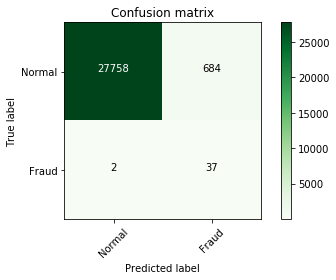

In [58]:
plot_confusion_matrix(confusion_matrix(y_test, np.argmax(pred, -1)), classes=['Normal', 'Fraud'])


In [48]:
print(classification_report(y_test, np.argmax(pred, -1), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28442
           1       0.05      0.95      0.10        39

    accuracy                           0.98     28481
   macro avg       0.53      0.96      0.54     28481
weighted avg       1.00      0.98      0.99     28481



## the wrong prediction in test data



In [40]:
test_data = pd.concat([X_test, y_test], 1)
test_data['predict'] =  np.argmax(pred, -1)
test_data['wrong_predict_with_class_0'] = np.where((test_data.predict==1) & (test_data.Class==0), 1, 0)
test_data['wrong_predict_with_class_1'] = np.where((test_data.predict==0) & (test_data.Class==1), 1, 0)

In [41]:
test_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,norm_Time,norm_clip_Amount,Class,predict,wrong_predict_with_class_0,wrong_predict_with_class_1
43428,2.010921,-0.201145,-1.135414,0.146220,0.157315,-0.288699,-0.099141,-0.037998,0.349127,0.292931,...,-0.581790,-0.236938,-0.056985,-0.059608,0.678295,-0.901459,0,0,0,0
49906,-0.694913,0.956927,0.669175,-0.950677,1.421292,-1.232131,1.727706,-1.021726,1.968499,0.166092,...,-0.038981,-0.226299,0.035737,-0.274391,0.138016,-1.000000,0,0,0,0
29474,2.011953,-0.150856,-1.019926,0.329493,-0.195552,-0.959457,0.035339,-0.153201,0.383977,0.262991,...,-0.365258,0.175076,-0.079150,-0.070677,0.609160,-0.993272,0,0,0,0
276481,0.067293,0.720063,-0.103997,-0.914583,0.839094,-0.279311,0.825530,0.055029,-0.092944,-0.212715,...,-0.425189,0.182934,0.235681,0.075551,0.984247,-0.987835,0,0,0,0
278846,2.042907,-0.202683,-0.701698,0.162485,0.051353,0.134167,-0.403815,-0.044463,1.059675,-0.220288,...,-0.252958,-0.618007,0.039861,-0.027035,0.889300,-0.966054,0,0,0,0


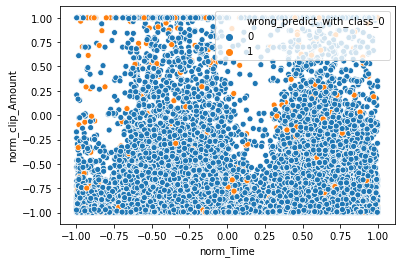

In [42]:
sns.scatterplot(x='norm_Time', y='norm_clip_Amount', hue='wrong_predict_with_class_0', data=test_data)

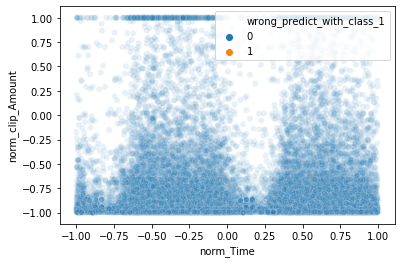

In [43]:
sns.scatterplot(x='norm_Time', y='norm_clip_Amount', hue='wrong_predict_with_class_1', data=test_data, alpha=0.1)